In [2]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import os

In [3]:
def cambiar_tipo_dato(df):
    for columna in df.columns:
        try:
            df[columna] = pd.to_numeric(df[columna])
        except ValueError:
            pass
    return df

In [4]:
from ckanapi import RemoteCKAN

def scrape_ckan_data(resource_id, limit):
    # URL del CKAN
    ckan_url = 'https://open.canada.ca/data/en/'

    # Inicializar el objeto RemoteCKAN
    rc = RemoteCKAN(ckan_url)

    # Construir la consulta para recuperar datos específicos utilizando algunos campos del diccionario de datos
    query = {
        "resource_id": resource_id,
        "fields": [
            "Model year",
            "Make",
            "Model",
            "Vehicle class",
            "Engine size (L)",
            "Cylinders",
            "Transmission",
            "Fuel type",
            "City (L/100 km)",
            "Highway (L/100 km)",
            "Combined (L/100 km)",
            "Combined (mpg)",
            "CO2 emissions (g/km)",
            "CO2 rating",
            "Smog rating"
        ],
        "limit": limit
    }

    # Realizar la consulta
    result = rc.action.datastore_search(**query)

    # Obtener los registros
    records = result['records']

    # Convertir los registros a un DataFrame de pandas
    df = pd.DataFrame(records)
    
    return df

# Llamar a la función para cada recurso y obtener los datos
df_2004 = scrape_ckan_data("42495676-28b7-40f3-b0e0-3d7fe005ca56", 7292) #Fuel consumption ratings (1995-2004)
df_2014 = scrape_ckan_data("2309538b-53d1-4635-a88e-e237bfcef7a2", 10562) #Fuel consumption ratings (2005-2014)
df_2019 = scrape_ckan_data("332be680-9577-42c6-8c47-a0380ef48c5e", 5432) #Fuel consumption ratings (2015-2019)

df_2020 = scrape_ckan_data("56a89c09-d609-41cd-8838-9dd9905d3cfc", 975) #2020 Fuel Consumption Ratings (2023-02-03)
df_2021 = scrape_ckan_data("f2e53a2b-e075-473a-9a9c-5d7bef68d07d", 971) #2021 Fuel Consumption Ratings (2023-02-03)
df_2022 = scrape_ckan_data("87fc1b5e-fafc-4d44-ac52-66656fc2a245", 971) #2022 Fuel Consumption Ratings (2023-08-18)
df_2023 = scrape_ckan_data("b6100f60-5e63-437d-b122-db76c467c0a7", 833) #2023 Fuel Consumption Ratings (2023-08-18)
df_2024 = scrape_ckan_data("edba4afa-dc19-480c-bbe4-57992fc9d0d6", 833) #2024 Fuel Consumption Ratings (2024-02-19)
#df_20242 = scrape_ckan_data("026e45b4-eb63-451f-b34f-d9308ea3a3d9", 668) #Battery-electric vehicles (2012-2024)

In [7]:
ruta_archivo1 = '..\\..\\datasets\\2015-2021 fuel consumption\\my2015-2019-fuel-consumption-ratings.csv'
ruta_archivo2 = '..\\..\\datasets\\2015-2021 fuel consumption\\my2020-fuel-consumption-ratings.csv'
ruta_archivo3 = '..\\..\\datasets\\2015-2021 fuel consumption\\my2021-fuel-consumption-ratings.csv'

df15_19 = pd.read_csv(ruta_archivo1)
df20 = pd.read_csv(ruta_archivo2)
df21 = pd.read_csv(ruta_archivo3)

## trabajando con df15_19

In [8]:
cambiar_tipo_dato(df15_19).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5431 entries, 0 to 5430
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            5431 non-null   int64  
 1   Make                  5431 non-null   object 
 2   Model                 5431 non-null   object 
 3   Vehicle class         5431 non-null   object 
 4   Engine size (L)       5431 non-null   float64
 5   Cylinders             5431 non-null   int64  
 6   Transmission          5431 non-null   object 
 7   Fuel type             5431 non-null   object 
 8   City (L/100 km)       5431 non-null   float64
 9   Highway (L/100 km)    5431 non-null   float64
 10  Combined (L/100 km)   5431 non-null   float64
 11  Combined (mpg)        5431 non-null   int64  
 12  CO2 emissions (g/km)  5431 non-null   int64  
 13  CO2 rating            4303 non-null   float64
 14  Smog rating           3197 non-null   float64
dtypes: float64(6), int64(

In [9]:
df18_19 = df15_19[df15_19['Model year'] >= 2018]
df18_19.head(2)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
3292,2018,Acura,ILX,Compact,2.4,4,AM8,Z,9.4,6.8,8.2,34,192,6.0,3.0
3293,2018,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS9,Z,12.6,9.0,11.0,26,259,4.0,3.0


In [10]:
#veo si existen duplicados
df18_19[df18_19.duplicated()]

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating


In [ ]:
#conversion de columnas L/100km
df18_19['City (ga/mi)'] = df18_19['City (L/100 km)']*1.60934/(100*3.78541)
df18_19['Highway (ga/mi)'] = df18_19['Highway (L/100 km)']*1.60934/(100*3.78541)
df18_19['Combined (ga/mi)'] = df18_19['Combined (L/100 km)']*1.60934/(100*3.78541)

In [12]:
#se eliminan las columnas L/100km
df18_19 = df18_19.drop(["City (L/100 km)", "Highway (L/100 km)", "Combined (L/100 km)"], axis=1)

In [13]:
columnas_a_eliminar2 = ['Vehicle class', 'Engine size (L)', 'Cylinders', 'Transmission', 'Fuel type', 'City (ga/mi)', 'Highway (ga/mi)']
df18_19 = df18_19.drop(columnas_a_eliminar2, axis=1)
df18_19.head()

,Model year,Make,Model,Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,Combined (ga/mi)
3292,2018,Acura,ILX,34,192,6.0,3.0,0.034862
3293,2018,Acura,MDX SH-AWD,26,259,4.0,3.0,0.046766
3294,2018,Acura,MDX SH-AWD Elite,26,251,4.0,3.0,0.045490
3295,2018,Acura,MDX Hybrid AWD,31,210,5.0,3.0,0.038263
3296,2018,Acura,NSX,26,261,4.0,3.0,0.046766


## Trabajando con df20

In [14]:
cambiar_tipo_dato(df20).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            975 non-null    int64  
 1   Make                  975 non-null    object 
 2   Model                 975 non-null    object 
 3   Vehicle class         975 non-null    object 
 4   Engine size (L)       975 non-null    float64
 5   Cylinders             975 non-null    int64  
 6   Transmission          975 non-null    object 
 7   Fuel type             975 non-null    object 
 8   City (L/100 km)       975 non-null    float64
 9   Highway (L/100 km)    975 non-null    float64
 10  Combined (L/100 km)   975 non-null    float64
 11  Combined (mpg)        975 non-null    int64  
 12  CO2 emissions (g/km)  975 non-null    int64  
 13  CO2 rating            975 non-null    int64  
 14  Smog rating           975 non-null    int64  
dtypes: float64(4), int64(6)

In [15]:
#veo si existen duplicados
df20[df20.duplicated()]

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating


In [16]:
#conversion de columnas L/100km
df20['City (ga/mi)'] = df20['City (L/100 km)']*1.60934/(100*3.78541)
df20['Highway (ga/mi)'] = df20['Highway (L/100 km)']*1.60934/(100*3.78541)
df20['Combined (ga/mi)'] = df20['Combined (L/100 km)']*1.60934/(100*3.78541)

In [17]:
#se eliminan las columnas L/100km
df20 = df20.drop(["City (L/100 km)", "Highway (L/100 km)", "Combined (L/100 km)"], axis=1)

In [18]:
df20 = df20.drop(columnas_a_eliminar2, axis=1)
df20.head()

,Model year,Make,Model,Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,Combined (ga/mi)
0,2020,Acura,ILX,33,199,6,3,0.036562
1,2020,Acura,MDX SH-AWD,26,254,4,3,0.046341
2,2020,Acura,MDX SH-AWD A-SPEC,26,258,4,3,0.046766
3,2020,Acura,MDX Hybrid AWD,31,210,5,3,0.038263
4,2020,Acura,NSX,26,261,4,3,0.046766


## Trabajando con df21

In [19]:
cambiar_tipo_dato(df21).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            970 non-null    int64  
 1   Make                  970 non-null    object 
 2   Model                 970 non-null    object 
 3   Vehicle class         970 non-null    object 
 4   Engine size (L)       970 non-null    float64
 5   Cylinders             970 non-null    int64  
 6   Transmission          970 non-null    object 
 7   Fuel type             970 non-null    object 
 8   City (L/100 km)       970 non-null    float64
 9   Highway (L/100 km)    970 non-null    float64
 10  Combined (L/100 km)   970 non-null    float64
 11  Combined (mpg)        970 non-null    int64  
 12  CO2 emissions (g/km)  970 non-null    int64  
 13  CO2 rating            970 non-null    int64  
 14  Smog rating           970 non-null    int64  
dtypes: float64(4), int64(6)

In [20]:
#veo si existen duplicados
df21[df21.duplicated()]

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating


In [21]:
#conversion de columnas L/100km
df21['City (ga/mi)'] = df21['City (L/100 km)']*1.60934/(100*3.78541)
df21['Highway (ga/mi)'] = df21['Highway (L/100 km)']*1.60934/(100*3.78541)
df21['Combined (ga/mi)'] = df21['Combined (L/100 km)']*1.60934/(100*3.78541)

In [22]:
#se eliminan las columnas L/100km
df21 = df21.drop(["City (L/100 km)", "Highway (L/100 km)", "Combined (L/100 km)"], axis=1)

In [23]:
df21 = df21.drop(columnas_a_eliminar2, axis=1)
df21.head()

,Model year,Make,Model,Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,Combined (ga/mi)
0,2021,Acura,ILX,33,199,6,3,0.036562
1,2021,Acura,NSX,26,256,4,3,0.046766
2,2021,Acura,RDX SH-AWD,29,232,5,6,0.042089
3,2021,Acura,RDX SH-AWD A-SPEC,27,242,5,6,0.043790
4,2021,Acura,TLX SH-AWD,29,230,5,7,0.041664


## Trabajando con df_2022

In [24]:
df_2022.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,MDX Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5
3,2022,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,256,5,3
4,2022,Acura,RDX SH-AWD,Sport utility vehicle: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6


In [25]:
cambiar_tipo_dato(df_2022).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            971 non-null    int64  
 1   Make                  971 non-null    object 
 2   Model                 971 non-null    object 
 3   Vehicle class         971 non-null    object 
 4   Engine size (L)       971 non-null    float64
 5   Cylinders             971 non-null    int64  
 6   Transmission          971 non-null    object 
 7   Fuel type             971 non-null    object 
 8   City (L/100 km)       971 non-null    float64
 9   Highway (L/100 km)    971 non-null    float64
 10  Combined (L/100 km)   971 non-null    float64
 11  Combined (mpg)        971 non-null    int64  
 12  CO2 emissions (g/km)  971 non-null    int64  
 13  CO2 rating            971 non-null    int64  
 14  Smog rating           971 non-null    int64  
dtypes: float64(4), int64(6)

In [26]:
#ver duplicados
df_2022[df_2022.duplicated()]

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating


In [27]:
df_2022['City (ga/mi)'] = df_2022['City (L/100 km)']*1.60934/(100*3.78541)
df_2022['Highway (ga/mi)'] = df_2022['Highway (L/100 km)']*1.60934/(100*3.78541)
df_2022['Combined (ga/mi)'] = df_2022['Combined (L/100 km)']*1.60934/(100*3.78541)

In [28]:
#se eliminan las columnas L/100km
df_2022 = df_2022.drop(["City (L/100 km)", "Highway (L/100 km)", "Combined (L/100 km)"], axis=1)

In [29]:
df_2022 = df_2022.drop(columnas_a_eliminar2, axis=1)
df_2022.head()

,Model year,Make,Model,Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,Combined (ga/mi)
0,2022,Acura,ILX,33,200,6,3,0.036562
1,2022,Acura,MDX SH-AWD,25,263,4,5,0.047616
2,2022,Acura,MDX Type S,23,291,4,5,0.052718
3,2022,Acura,NSX,26,256,5,3,0.046766
4,2022,Acura,RDX SH-AWD,29,232,5,6,0.042089


## concatenar verticalmente los dataframes df18_19, df20, df21, df_2022

In [30]:
df18_22 = pd.concat([df18_19, df20, df21, df_2022], axis=0, ignore_index=True)
df18_22

,Model year,Make,Model,Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,Combined (ga/mi)
0,2018,Acura,ILX,34,192,6.0,3.0,0.034862
1,2018,Acura,MDX SH-AWD,26,259,4.0,3.0,0.046766
2,2018,Acura,MDX SH-AWD Elite,26,251,4.0,3.0,0.045490
3,2018,Acura,MDX Hybrid AWD,31,210,5.0,3.0,0.038263
4,2018,Acura,NSX,26,261,4.0,3.0,0.046766
...,...,...,...,...,...,...,...,...
5050,2022,Volvo,S90 B6 AWD,31,212,5.0,7.0,0.038688
5051,2022,Volvo,V60 T6 AWD,29,224,5.0,7.0,0.040814
5052,2022,Volvo,V60 CC T5 AWD,30,221,5.0,5.0,0.040389
5053,2022,Volvo,V90 CC B6 AWD,30,222,5.0,7.0,0.040389


## Calculamos los vehículos mas eficientes

In [31]:
top_10_eficientes_18_22 = df18_22.sort_values(by='Combined (ga/mi)', ascending=True).head(15)
top_10_eficientes_18_22 

,Model year,Make,Model,Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,Combined (ga/mi)
3571,2021,Hyundai,IONIQ Blue,71,94,10.0,7.0,0.017006
4548,2022,Hyundai,IONIQ Blue,71,94,10.0,7.0,0.017006
529,2018,Hyundai,IONIQ Blue,69,96,10.0,7.0,0.017431
2604,2020,Hyundai,IONIQ Blue,69,96,10.0,7.0,0.017431
1565,2019,Hyundai,IONIQ Blue,69,96,10.0,7.0,0.017431
3570,2021,Hyundai,IONIQ,67,99,10.0,7.0,0.017856
4547,2022,Hyundai,IONIQ,67,99,9.0,7.0,0.017856
2603,2020,Hyundai,IONIQ,67,99,10.0,7.0,0.017856
1564,2019,Hyundai,IONIQ,66,104,10.0,7.0,0.018281
528,2018,Hyundai,IONIQ,66,102,10.0,7.0,0.018281


## Visualizacion

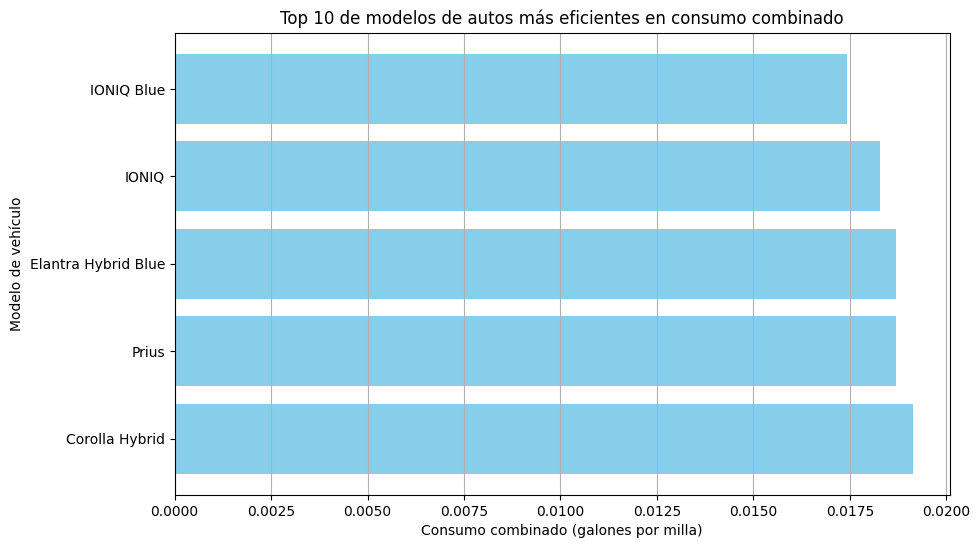

In [32]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.barh(top_10_eficientes_18_22['Model'], top_10_eficientes_18_22['Combined (ga/mi)'], color='skyblue')
plt.xlabel('Consumo combinado (galones por milla)')
plt.ylabel('Modelo de vehículo')
plt.title('Top 10 de modelos de autos más eficientes en consumo combinado')
plt.gca().invert_yaxis()  # Invertir el eje y para que el modelo más eficiente esté en la parte superior
plt.grid(axis='x')  # Agregar líneas de rejilla solo en el eje x
plt.show()